In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

#그래프에서 한글을 사용하기 위해서 설정
if platform.system() == 'Darwin':
    rc('font', family="AppleGothic")
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)

#그래프에 음수를 사용하기 위해서 설정
plt.rcParams['axes.unicode_minus'] = False

In [24]:

df = pd.read_csv('./data/stock-data.csv')
print(df.head())
print(df.info())
print(df.dtypes)
print(df)

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None
Date      object
Close      int64
Start      int64
High       int64
Low        int64
Volume     int64
dtype: object
          Date  Close  Start   High    Low  Volume
0   2018-07-02  10100  10850  10900  10000  137977
1   2018-06-29  10700  10550  10900  

In [23]:
#날짜 자료형으로 변경해서 새로운 필드로 저장
df['NewDate'] = pd.to_datetime(df['Date']) 
print(df.info())  
df['NewDate'].dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     20 non-null     object        
 1   Close    20 non-null     int64         
 2   Start    20 non-null     int64         
 3   High     20 non-null     int64         
 4   Low      20 non-null     int64         
 5   Volume   20 non-null     int64         
 6   NewDate  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


dtype('<M8[ns]')

In [16]:
#새로 만들어진 날짜 컬럼을 인덱스로 지정하고 기존의 날짜 컬럼 삭제
df.set_index('NewDate', inplace=True)
df.drop('Date', axis=1, inplace=True)
print(df.head)

<bound method NDFrame.head of             Close  Start   High    Low  Volume
NewDate                                       
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039
2018-06-25  11150  11400  11450  11000   55519
2018-06-22  11300  11250  11450  10750  134805
2018-06-21  11200  11350  11750  11200  133002
2018-06-20  11550  11200  11600  10900  308596
2018-06-19  11300  11850  11950  11300  180656
2018-06-18  12000  13400  13400  12000  309787
2018-06-15  13400  13600  13600  12900  201376
2018-06-14  13450  13200  13700  13150  347451
2018-06-12  13200  12200  13300  12050  558148
2018-06-11  11950  12000  12250  11950   62293
2018-06-08  11950  11950  12200  11800   59258
2018-06-07  11950  12200  12300  11900   49088
2018-06-05  12150  11800  12250  11800   42485
2018-06-04  11900  11900  1220

In [21]:
#첫번째 데이터는 날짜로 변경 가능한 데이터이고
#두번째 데이터는 날짜로 변경 불가능한 데이터
date_strings = np.array([
    '03-04-2005 11:35 PM','04-09-2009 09:09 TM'])

#예외 발생
#print([pd.to_datetime(date, format='%d-%m- %l:%m:%p') for date in date_strings])
#예외가 발생하면 문자열 그대로 저장
#list는 2개의 데이터 자료형이 달라도 문제가 없지만 
#array나 DataFeame으로 벼노환해서 사용하는 경우에는 문제가 발생할 수도 있음
#이 방법은 권장하지 않음
print([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='ignore') for date
in date_strings])
print(pd.DataFrame([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='ignore') for date
in date_strings]).info())


#변환이 안되는 경우는 NaT로 설정
print(pd.DataFrame([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='coerce') for date
in date_strings]).info())

#예외를 발생하도록 함(주로 이걸 사용함)
print(pd.DataFrame([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='raise') for date
in date_strings]).info())


[Timestamp('2005-04-03 23:35:00'), '04-09-2009 09:09 TM']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes
None


ValueError: time data '04-09-2009 09:09 TM' does not match format '%d-%m-%Y %I:%M %p' (match)

In [24]:
#주기 설정
date_strings = np.array([
    '2005-03-04','2009-04-09', '2023-04-05'])

pddates = pd.to_datetime(date_strings)
#월단위로 변경
pr_months = pddates.to_period(freq='M')
print(pr_months)

PeriodIndex(['2005-03', '2009-04', '2023-04'], dtype='period[M]')


In [27]:
#2023년 1월 1일 부터 월단위로 12개를 생성
ts_ms = pd.date_range(start = "2023-01-01", periods=12, freq='MS', tz='Asia/Seoul')
print(ts_ms)

DatetimeIndex(['2023-01-01 00:00:00+09:00', '2023-02-01 00:00:00+09:00',
               '2023-03-01 00:00:00+09:00', '2023-04-01 00:00:00+09:00',
               '2023-05-01 00:00:00+09:00', '2023-06-01 00:00:00+09:00',
               '2023-07-01 00:00:00+09:00', '2023-08-01 00:00:00+09:00',
               '2023-09-01 00:00:00+09:00', '2023-10-01 00:00:00+09:00',
               '2023-11-01 00:00:00+09:00', '2023-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


In [ ]:
print(dir(pd.to_datetime(['21-08-2023'])))

In [29]:
#데이터를 가져와서 문자열을 날짜로 설정
df = pd.read_csv('./data/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date', inplace=True)
print(df.head())

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


In [31]:
#날짜 인덱스라서 날짜의 일부분을 가지고 인덱싱 가능
df_y = df.loc['2018']
print(df_y.head())

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


In [32]:
df_y = df.loc['2018-06-25':'2018-06-30', 'Start':'Low']
print(df_y.head())

            Start   High    Low
new_Date                       
2018-06-29  10550  10900   9990
2018-06-28  10900  10950  10150
2018-06-27  10800  11050  10500
2018-06-26  10900  11000  10700
2018-06-25  11400  11450  11000


In [35]:
time_index = pd.date_range('01-01-2023', periods=5, freq='M')
dataframe = pd.DataFrame(index=time_index)
dataframe['Sales'] = [1.0, 2.0, np.nan, np.nan, 5.0]
#print(dataframe)

#앞의 데이터로 채우기
print(dataframe.ffill())

#선형보간
#print(dataframe.interpolate())

#비선형보간
print(dataframe.interpolate(method='quardratic'))

            Sales
2023-01-31    1.0
2023-02-28    2.0
2023-03-31    2.0
2023-04-30    2.0
2023-05-31    5.0


ValueError: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'quardratic' instead.

In [38]:
dataframe['Stock_Price'] = [1, 2, 3, 4, 5]
#단순 이동 평균
print(dataframe.rolling(window=3).mean())
#지수 이동 평균
print(dataframe.ewm(span=3).mean())

            Sales  Stock_Price
2023-01-31    NaN          NaN
2023-02-28    NaN          NaN
2023-03-31    NaN          2.0
2023-04-30    NaN          3.0
2023-05-31    NaN          4.0
               Sales  Stock_Price
2023-01-31  1.000000     1.000000
2023-02-28  1.666667     1.666667
2023-03-31  1.666667     2.428571
2023-04-30  1.666667     3.266667
2023-05-31  4.473684     4.161290


In [2]:
import cv2
print(cv2.__version__)

4.8.0


In [6]:
#사각형 생성
#흰색 이미지 배열 생성
#자료형을 np.uint8로 설정 - 이미지는 0~255 사이의 숫자만 이용
#이미지가 2차원이면 흑백이고 3차원이면 컬러
image = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

#튜플로 좌표 생성
pt1 = 100, 100
pt2 = 400, 400
#255 = V, 0 = G, 0 = R
cv2.rectangle(image, pt1, pt2, (255, 0, 0), 2)

#원도우 생성
cv2.namedWindow("윈도우 생성")
#윈도우에 이미지 출력                
cv2.imshow("윈도우 생성", image)
#키보드 입력 대기
cv2.waitKey(0)
#윈도우 종료
cv2.destroyAllWindows()

In [11]:

#흰색 이미지 배열 생성
#자료형을 np.uint8로 설정 - 이미지는 0~255 사이의 숫자만 이용
#이미지가 2차원이면 흑백이고 3차원이면 컬러
image = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
#open cv에서는 옵션을 정수로 설정함 -> / 아니고 //
cv2.circle(image, (image.shape[0]//2, image.shape[1]//2),
                 radius=50, color=(0, 0, 255), thickness=-1)

#원도우 생성
cv2.namedWindow("윈도우 생성")
#윈도우에 이미지 출력                
cv2.imshow("윈도우 생성", image)
#키보드 입력 대기
cv2.waitKey(0)
#윈도우 종료
cv2.destroyAllWindows()

(2270, 3600)


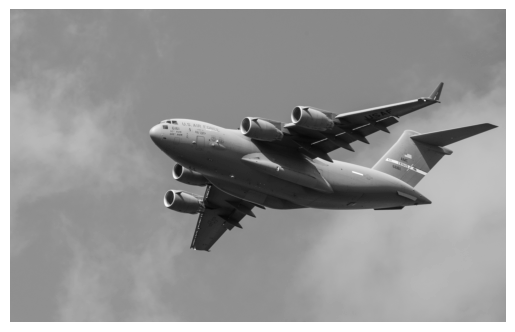

In [16]:
import cv2
from matplotlib import pyplot as plt

#이미지 데이터를 흑백으로 가져오기 - 2차원 배열
#C/C++이나 Python에서는 상수를정의할 때 이름을 사용한 경우
#상수 대신에 값을 직접 입력해도 됨
#cv2_IMREAD_GRAYSCALE 대시에 0을 입력해도 됨
#그렇지만 상수 이름을 사용하는 것을 구너장
image = cv2.imread('./python_opencv-main/data/plane.jpg', cv2.IMREAD_GRAYSCALE)
print(image.shape)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

(2270, 3600, 3)


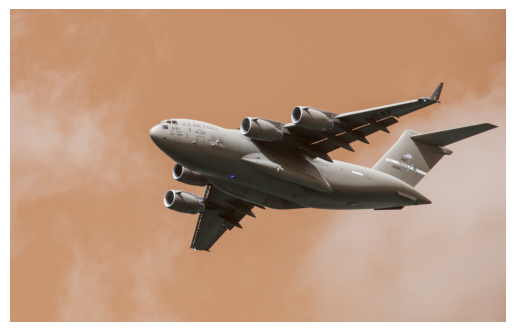

In [18]:
#Open CV는 이미지를 컬러오 가져오면 RGB가 아니라 GBR임
image = cv2.imread('./python_opencv-main/data/plane.jpg', cv2.IMREAD_COLOR)
print(image.shape)

plt.imshow(image)
plt.axis("off")
plt.show()


(2270, 3600, 3)


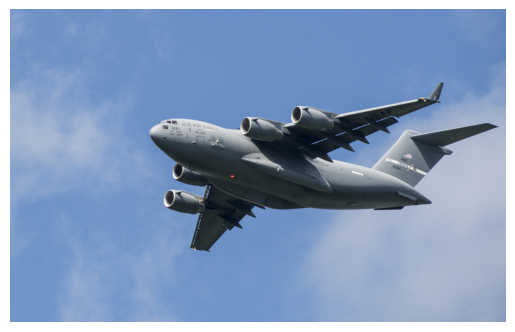

In [20]:
image = cv2.imread('./python_opencv-main/data/plane.jpg', cv2.IMREAD_COLOR)
print(image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [23]:
image = cv2.imread('./python_opencv-main/data/plane.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./data/plane_new.jpg', image)

True

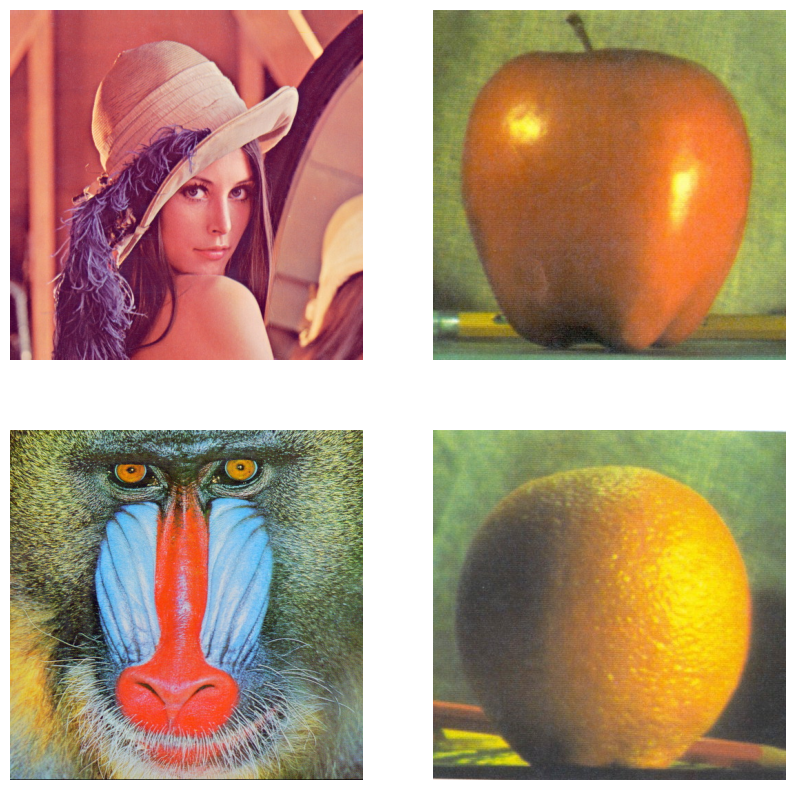

In [33]:
#4개의 이미지를 2*2로 출력
imgBGR1 = cv2.imread('./python_opencv-main/data/lena.jpg')
imgBGR2 = cv2.imread('./python_opencv-main/data/apple.jpg')
imgBGR3 = cv2.imread('./python_opencv-main/data/baboon.jpg')
imgBGR4 = cv2.imread('./python_opencv-main/data/orange.jpg')

imgBGR1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgBGR2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgBGR3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgBGR4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

#여러 개의 영역 만들기
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey = True)

ax[0][0].axis('off')
ax[0][0].imshow(imgBGR1, aspect='auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgBGR2, aspect='auto')

ax[1][0].axis('off')
ax[1][0].imshow(imgBGR3, aspect='auto')

ax[1][1].axis('off')
ax[1][1].imshow(imgBGR4, aspect='auto')

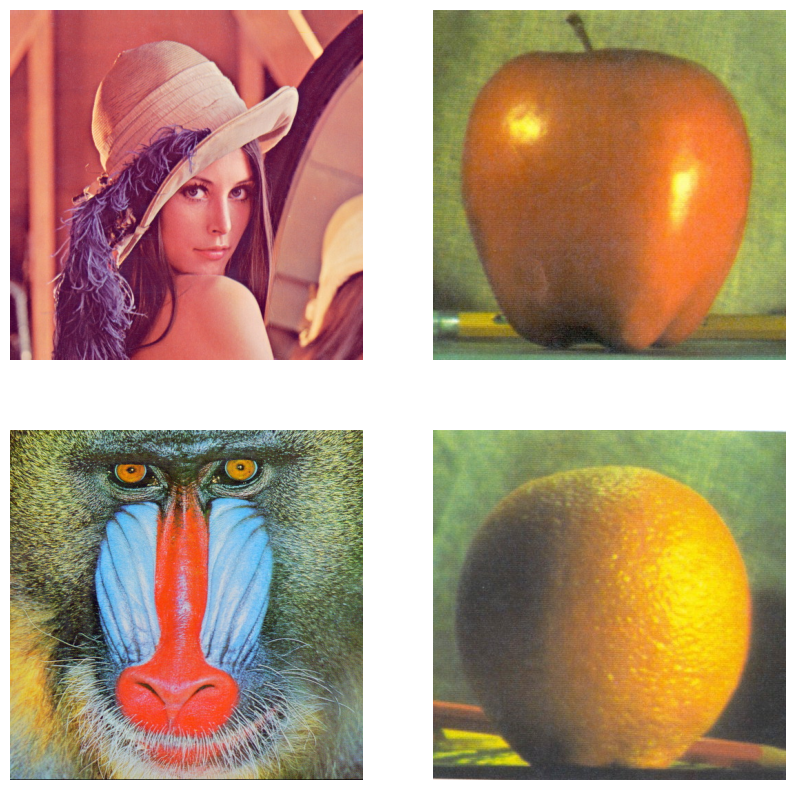

In [9]:
DATA_DIR = './python_opencv-main/data/'

#4개의 이미지를 2*2로 출력
imgBGRs = []

imgBGRs.append(cv2.imread(DATA_DIR + 'lena.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR + 'apple.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR + 'baboon.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR + 'orange.jpg'))


imgRGBs = []
for i in imgBGRs:
    imgRGBs.append(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

#여러 개의 영역 만들기
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey = True)

length = len(imgRGBs)
for i in range(length):
    ax[i // 2][i % 2].axis('off')
    ax[i //2][i % 2].imshow(imgRGBs[i],aspect='auto')

plt.show()


In [53]:
import cv2
def put_string(frame, text, pt, value, color=(120, 200, 90)): # 문자열 출력 함수 - 그림자 효과
    text += str(value)
    shade = (pt[0] + 2, pt[1] + 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, text, shade, font, 0.7, (0, 0, 0), 2) # 그림자 효과
    cv2.putText(frame, text, pt, font, 0.7, (120, 200, 90), 2) # 글자 적기
    
# 현재 디바이스의 첫번째 카메라 연결
capture = cv2.VideoCapture(0)

#카메라가 연결되지 않으면 종료
if capture.isOpened() == False:
    raise Exception("카메라 연결 안됨")
    
while True: # 무한 반복
    ret, frame = capture.read() # 카메라 영상 받기
    if not ret: break
    if cv2.waitKey(30) >= 0: break
    
    exposure = capture.get(cv2.CAP_PROP_EXPOSURE)
    put_string(frame, "EXPOS: ", (10, 40), exposure)
    title = "View Frame from Camera"
    cv2.imshow(title, frame) # 윈도우에 영상 띄우기
capture.release()

In [11]:
import cv2
#일반적으로 iphone이나 webcam은 video를 설정하면 되고 android는 mjpegfeed를 설정
cap = cv2.VideoCapture('http://172.30.31.171:4747/mjpegfeed') # droid cam

#카메라 해상도 확인
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:
    #스마트 폰 카메라가 활영하고 있는 영상을 가져오기
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
    #영상을 화면에 출력
    cv2.imshow('frame',frame)
    #키보드 대기
    key = cv2.waitKey(25)
    #esc 누르면 종료
    if key == 27: # Esc
        break
        
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_size = (0, 0)


img shape: (512, 512)
img shape: (262144,)
img shape: (1, 512, 512)


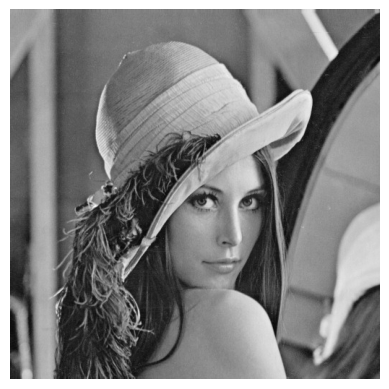

In [16]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./python_opencv-main/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
print("img shape:", img.shape)

#2차원 이미지를 1차원으로 변경
img = img.flatten()
print("img shape:", img.shape)

#1차원 이미지를 3차원으로 변경
#-1은 나머지를 전부 사용한다라는 의미
#262144/ 512/ 512가 첫번째 차원
img = img.reshape(-1, 512, 512)
print("img shape:", img.shape)

plt.imshow(img[0], cmap='gray')
plt.axis('off')
plt.show()

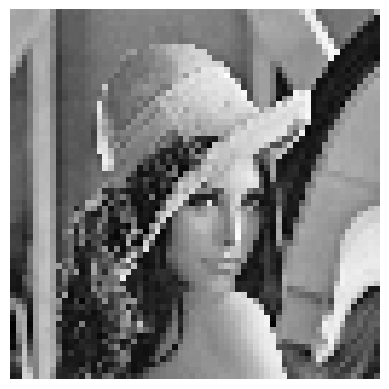

In [24]:
img = cv2.imread('./python_opencv-main/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (64,64))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

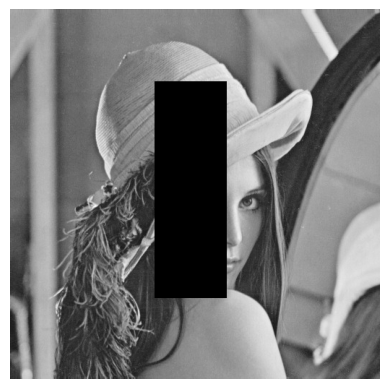

In [25]:
img = cv2.imread('./python_opencv-main/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img[100, 200] = 0
#이미지의 특정 부분을 선택하는 것을 R이라고 함
#이미지 전처리의 핵심 중 하나가 ROI 부분을 다른 부분과 확연하게 구분되도록 하는 것
img[100:400, 200:300] = 0

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

(512, 512, 3)


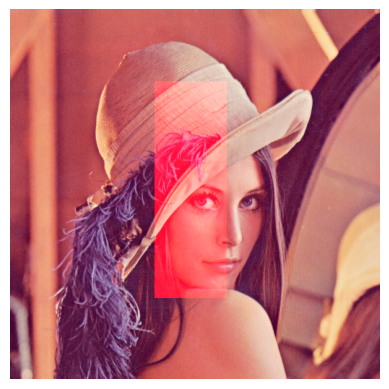

In [28]:
img = cv2.imread('./python_opencv-main/data/lena.jpg')

#BGR을 RGB로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
#채널 접근
#맨 앞이 세로, 두번째가 가로, 세번째가 색상
img[100:400, 200:300, 0] = 255

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img = cv2.imread('./python_opencv-main/data/lena.jpg')
roi = cv2.selectROI(img)
print('roi:', roi)

#선택 영역만 추출
img = img[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]]
cv2.imshow("IMG", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
img = cv2.imread('./python_opencv-main/data/lena.jpg')

#채널 분할
b, g, r = cv2.merge([r, g, b])

plt.image.
plt.axis('off')

NameError: name 'r' is not defined

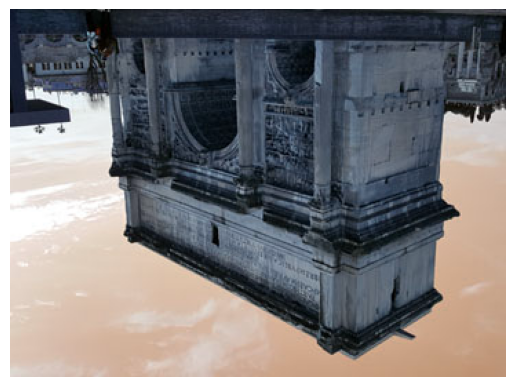

In [12]:
#회전
image = cv2.imread('./python_opencv-main/data/flip_test.jpg')

#축을 기준으로 뒤집기
#flip = cv2.flip(image, -1)
#행열을 전치
#flip = cv2.transpose(image)
#90도
#flip = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
#180도
#flip = cv2.rotate(image,cv2.ROTATE_180)
flip = cv2.rotate(image,cv2.ROTATE_CLOCKWISE)

plt.imshow(flip)
plt.axis('off')
plt.show()

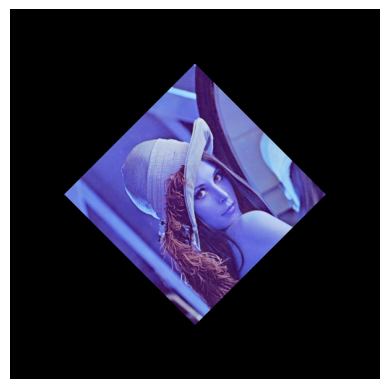

In [16]:
src = cv2.imread('./python_opencv-main/data/lena.jpg')

rows, cols, channels = src.shape
#중앙을 기분으로 45도 회전하고 0.5배 축소한 이미지 생성
M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45,0.5)
src = cv2.warpAffine(src, M1, (rows, cols))


plt.imshow(src)
plt.axis('off')
plt.show()